# **1. Introduction to Econometrics: Sample Survey Data Analysis Project**

***
#### **1.1 About the Project**
In an effort to add more to my Github portfolio I have decided to redo a past STATA project using Python. The Project was Sample Survey Data Analysis. I had completed the project for my Introduction to Econometrics Course at Bard College. Although, I appreciate that I was able to code in STATA, I believe that it would be much more beneficial for me to conduct this type analysis on Python; for my own personal growth and because softwares like Python and R are commonly used in the Data Analytics industry.

#### **1.2 About the Data**
It contains demographic data from the 2020 American Community Service (ACS), from IPUMS. 
> *"IPUMS USA collects, preserves and harmonizes U.S. census microdata and provides easy access to this data with enhanced documentation. Data includes decennial censuses from 1790 to 2010 and American Community Surveys (ACS) from 2000 to the present." - IPUMS.*

***

<span style="color:red">For more details about the data please review the codebook: "cps_codebook.txt"</span>




![Data Analysis steps](/Users/aisaiahpellecer/Desktop/ds_projects/sample_survey_data_analysis/process.png "Data Analysis Process")

***
# **2. Data Collection**
Luckily the data set was pulled from CPS and is available in the project folder. All that is left is to introduce the tools and load the dataframe.

**Dataset:** "https://raw.githubusercontent.com/aisaiahpellecer/data-science-projects/main/sample_survey_data_analysis/IPUMS2020.csv"

***

### 2.1 Tools 
* Pandas 
* Matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Creating the dataframe and taking a look

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aisaiahpellecer/data-science-projects/main/sample_survey_data_analysis/IPUMS2020.csv")
print(df)


       YEAR  SAMPLE   SERIAL       CBSERIAL   HHWT        CLUSTER  STRATA  GQ  \
0      2020  202001       22  2020010001976   6026  2020000000221   60001   3   
1      2020  202001      284  2020010020986   4716  2020000002841   10001   3   
2      2020  202001      415  2020010030404   6943  2020000004151   60001   3   
3      2020  202001      546  2020010039535   7205  2020000005461  200001   4   
4      2020  202001      939  2020010066760   7598  2020000009391  180001   3   
...     ...     ...      ...            ...    ...            ...     ...  ..   
10758  2020  202001  1192515  2020000623979  36025  2020011925151   50056   1   
10759  2020  202001  1192908  2020000826181  10218  2020011929081   20056   1   
10760  2020  202001  1192908  2020000826181  10218  2020011929081   20056   1   
10761  2020  202001  1193039  2020000902881    131  2020011930391   50056   1   
10762  2020  202001  1193301  2020001051902   3668  2020011933011   30056   1   

       PERNUM  PERWT  SEX  

***
### **3. Understanding the Data**
***

#### 3.1 Number of Columns and Rows

In [4]:
rows = df.shape[0]
columns = df.shape[1]

print(f'there are {rows} rows and {columns} columns in the dataframe')

there are 10763 rows and 18 columns in the dataframe


#### 3.2 Column Titles

In [5]:

for col in df.columns:
    print(col)

YEAR
SAMPLE
SERIAL
CBSERIAL
HHWT
CLUSTER
STRATA
GQ
PERNUM
PERWT
SEX
AGE
EDUC
EDUCD
WKSWORK1
UHRSWORK
INCTOT
INCWAGE


#### 3.3 Checking the Data for Missing Values

To ensure that I am using data of good quality it is important to check.

In [6]:
print("The sum of missing values in each column")
missing_values = df.isnull().mean()



print(missing_values)

# assert 0 =! missing_values, "Result: There are missing values in the data set"
# assert( (63 <= df_10.mean()).bool() & (df_10.mean() <= 65).bool() ), "The Catch 10 simulation is not correct!"




The sum of missing values in each column
YEAR        0.0
SAMPLE      0.0
SERIAL      0.0
CBSERIAL    0.0
HHWT        0.0
CLUSTER     0.0
STRATA      0.0
GQ          0.0
PERNUM      0.0
PERWT       0.0
SEX         0.0
AGE         0.0
EDUC        0.0
EDUCD       0.0
WKSWORK1    0.0
UHRSWORK    0.0
INCTOT      0.0
INCWAGE     0.0
dtype: float64


***
### **4. Cleaning the Data**
***

***
### **5. Analyzing the Data**
***


#### 5.1: Summary Statistics


#### 5.1: Use appropriate graphs to show the distributions of total income and hours worked in the year. Note that the hours worked per year variable needs to be constructed from the two variables WKSWORK1 and UHRSWORK.


Text(0.5, 1.0, 'Distribution of Hours Worked per Year in 2020')

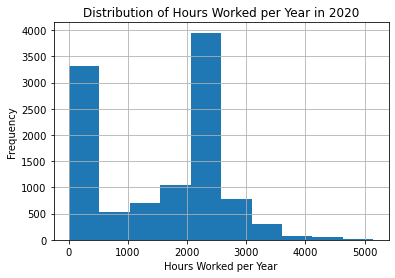

In [7]:
#Calculating the hours worked per year
df["hrs_year"] = df['WKSWORK1']*df['UHRSWORK']


#Constructing the histogram
df["hrs_year"].hist()
plt.xlabel("Hours Worked per Year")
plt.ylabel("Frequency")
plt.title("Distribution of Hours Worked per Year in 2020")


#### 5.2: Draw a scatter plot showing the relationship between total income and hours worked.


Text(0.5, 1.0, 'Total Income and Hours Worked in 2020')

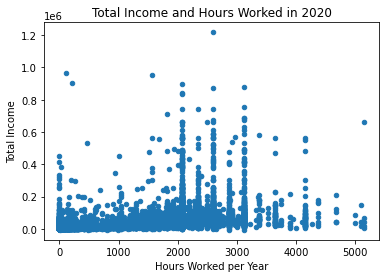

In [13]:
df.plot.scatter(y = 'INCTOT',x= "hrs_year")
plt.xlabel("Hours Worked per Year")
plt.ylabel("Total Income")
plt.title("Total Income and Hours Worked in 2020")


#### 5.3: Find the covariance and correlation coefficient between total income and hours worked.


In [25]:
cov_inc_hrs = np.cov(df['INCTOT'],y =df['hrs_year'])
cor_inc_hrs = df[['INCTOT','hrs_year']].corr()

print(f'Covariance Results:\n{cov_inc_hrs}\n\nCorrelation Results:\n{cor_inc_hrs}')


Covariance Results:
[[5.39935224e+09 3.27638972e+07]
 [3.27638972e+07 1.08804974e+06]]

Correlation Results:
            INCTOT  hrs_year
INCTOT    1.000000  0.427465
hrs_year  0.427465  1.000000


#### 5.4: Draw a regression line in the scatter plot and estimate the slope, intercept and R square.


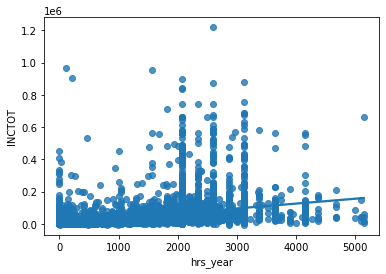

In [26]:
sns.regplot(x="hrs_year", y="INCTOT", data=df);


#### 5.5: Repeat everything using Wage and Salary Income (INCWAGE) as your Y variable and verify whether you find a stronger correlation than when you used Total Income (INCTOT). Explain Why?


Covariance Results:
[[3.95103419e+09 3.18773009e+07]
 [3.18773009e+07 1.08804974e+06]]

Correlation Results:
           INCWAGE  hrs_year
INCWAGE   1.000000  0.486185
hrs_year  0.486185  1.000000


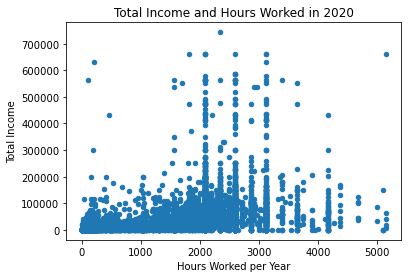

In [30]:
df.plot.scatter(y = 'INCWAGE',x= "hrs_year")
plt.xlabel("Hours Worked per Year")
plt.ylabel("Total Income")
plt.title("Total Income and Hours Worked in 2020")


cov_wage_hrs = np.cov(df['INCWAGE'],y =df['hrs_year'])
cor_wage_hrs = df[['INCWAGE','hrs_year']].corr()

print(f'Covariance Results:\n{cov_wage_hrs}\n\nCorrelation Results:\n{cor_wage_hrs}')

####  5.6: Using INCWAGE, repeat the correlation and regression analysis separately for men and women and compare the results.


In [51]:
df_F = df[df.SEX ==2]
df_M = df[df.SEX ==1]

Covariance Results:
[[2.37777019e+09 2.63559393e+07]
 [2.63559393e+07 1.00854758e+06]]

Correlation Results:
           INCWAGE  hrs_year
INCWAGE   1.000000  0.538202
hrs_year  0.538202  1.000000


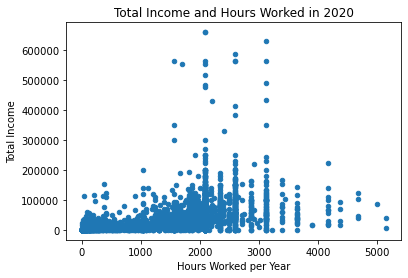

In [55]:
df_F.plot.scatter(y = 'INCWAGE',x= "hrs_year")
plt.xlabel("Hours Worked per Year")
plt.ylabel("Total Income")
plt.title("Total Income and Hours Worked in 2020")


cov_wage_hrs = np.cov(df_F['INCWAGE'],y =df_F['hrs_year'])
cor_wage_hrs = df_F[['INCWAGE','hrs_year']].corr()

print(f'Covariance Results:\n{cov_wage_hrs}\n\nCorrelation Results:\n{cor_wage_hrs}')

Covariance Results:
[[5.32065360e+09 3.50215709e+07]
 [3.50215709e+07 1.12909954e+06]]

Correlation Results:
           INCWAGE  hrs_year
INCWAGE   1.000000  0.451842
hrs_year  0.451842  1.000000


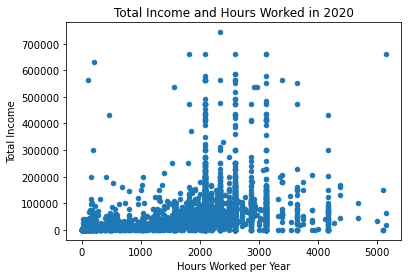

In [58]:
df_M.plot.scatter(y = 'INCWAGE',x= "hrs_year")
plt.xlabel("Hours Worked per Year")
plt.ylabel("Total Income")
plt.title("Total Income and Hours Worked in 2020")



cov_wage_hrs_M = np.cov(df_M['INCWAGE'],y =df_M['hrs_year'])
cor_wage_hrs_M = df_M[['INCWAGE','hrs_year']].corr()

print(f'Covariance Results:\n{cov_wage_hrs_M}\n\nCorrelation Results:\n{cor_wage_hrs_M}')